# Project 03 - Due Monday, November 13 at 12pm

*Objectives*: Use Spark to process and perform basic analysis on non-relational data, including its DataFrame and SQL interfaces.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with Python code, SQL queries, shell commands, and markdown cells.  The notebook itself should be completely reproducible (using AWS EC2 instance based on the provided AMI) from start to finish; another person should be able to use the code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking when appropriate.

*Attestation*: **Work in groups**.  At the end of your submitted notebook, identify the work each partner performed and attest that each contributed substantially to the work.

*Deadline*: Monday, November 13, 12pm.  One member of each group must submit your notebook to Blackboard; you should not submit it separately.

## Part 1 - Setup

Begin by setting up Spark and fetching the project data.  

**Note**: you may want to use a larger EC2 instance type than normal.  This project was prepared using a `t2.xlarge` instance.  Just remember that the larger the instance, the higher the per-hour charge, so be sure to remember to shut your instance down when you're done, as always.

### About the data

We will use JSON data from Twitter; we saw an example of this in class.  It should parse cleanly, allowing you to focus on analysis.

This data was gathered using GWU Libraries' [Social Feed Manager](http://sfm.library.gwu.edu/) application during a recent game of the MLB World Series featuring the Los Angeles Dodgers and Houston Astros.  This first file tells you a little bit about how it was gathered:

In [1]:
!wget https://s3.amazonaws.com/2017-dmfa/project-3/9670f3399f774789b7c3e18975d25611-README.txt

--2017-11-08 20:49:36--  https://s3.amazonaws.com/2017-dmfa/project-3/9670f3399f774789b7c3e18975d25611-README.txt
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.230.77
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.230.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1920 (1.9K) [text/plain]
Saving to: ‘9670f3399f774789b7c3e18975d25611-README.txt’

9670f3399f774789b7c 100%[===================>]   1.88K  --.-KB/s    in 0s      

2017-11-08 20:49:36 (151 MB/s) - ‘9670f3399f774789b7c3e18975d25611-README.txt’ saved [1920/1920]



In [2]:
!cat 9670f3399f774789b7c3e18975d25611-README.txt

This is an export created with Social Feed Manager.

EXPORT INFORMATION
Selected seeds: All seeds
Export id: 9670f3399f774789b7c3e18975d25611
Export type: twitter_filter
Format: Full JSON
Export completed:  Oct. 30, 2017, 11:21:04 p.m. EDT
Deduplicate: No

COLLECTION INFORMATION
Collection name: test set for world series
Collection id: 34e3f7460b5c4df09d64a1e61fd81238
Collection set: mlb-test (collection set id d6e8c27b1bc942e78790aa55a82b3a7a)
Harvest type: Twitter filter
Collection description: running for just one hour, just for fun.

Harvest options:
Media: No
Web resources: No

Seeds:
* Track: dodgers,astros - Active

Change log:

Change to test set for world series (collection) on Oct. 30, 2017, 10:59:56 p.m. EDT by dchud:
* is_active: "True" changed to "False"

Change to test set for world series (collection) on Oct. 30, 2017, 10:58:51 p.m. EDT by dchud:
* is_on: "True" changed to "False"

Change to test set for world series (collection) on Oct. 29, 2017, 8:01:24 p.m. EDT by dch

The most important pieces in that metadata are:

 * It tracked tweets that mentioned "dodgers" or "astros".  Every item in this set should refer to one or the other, or both.
 * This data was not deduplicated; we may see individual items more than once.
 * Data was collected between October 29 and October 30.  Game 5 of the Series was played during this time.
 
You should not need to know anything about baseball to complete this assignment.

**Please note**: sometimes social media data contains offensive material.  This data set has not been filtered; if you do come across something inappropriate, please do your best to ignore it if you can.

## Fetch the data

The following files are available:

 * https://s3.amazonaws.com/2017-dmfa/project-3/9670f3399f774789b7c3e18975d25611_003.json
 * https://s3.amazonaws.com/2017-dmfa/project-3/9670f3399f774789b7c3e18975d25611_004.json
 * https://s3.amazonaws.com/2017-dmfa/project-3/9670f3399f774789b7c3e18975d25611_005.json
 * https://s3.amazonaws.com/2017-dmfa/project-3/9670f3399f774789b7c3e18975d25611_006.json
 
### Q1.1 - Select at least one and obtain it using `wget`.  Verify the file sizes using the command line.

Each file should contain exactly 100,000 tweets.  

*Note*: you are only required to use one of these files, but you may use more than one.  It will be easier to process more data if you use a larger EC2 instance type, as suggested above.  Use the exact same set of files throughout the assignment.

**Answer**

#### Let's use all the files for our project.

In [3]:
!wget https://s3.amazonaws.com/2017-dmfa/project-3/9670f3399f774789b7c3e18975d25611_003.json

--2017-11-08 20:52:13--  https://s3.amazonaws.com/2017-dmfa/project-3/9670f3399f774789b7c3e18975d25611_003.json
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.160.149
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.160.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 595711407 (568M) [application/json]
Saving to: ‘9670f3399f774789b7c3e18975d25611_003.json’

9670f3399f774789b7c 100%[===================>] 568.11M  96.2MB/s    in 6.4s    

2017-11-08 20:52:20 (88.7 MB/s) - ‘9670f3399f774789b7c3e18975d25611_003.json’ saved [595711407/595711407]



In [4]:
!wget https://s3.amazonaws.com/2017-dmfa/project-3/9670f3399f774789b7c3e18975d25611_004.json

--2017-11-08 20:52:48--  https://s3.amazonaws.com/2017-dmfa/project-3/9670f3399f774789b7c3e18975d25611_004.json
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.85.157
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.85.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 549995846 (525M) [application/json]
Saving to: ‘9670f3399f774789b7c3e18975d25611_004.json’

9670f3399f774789b7c 100%[===================>] 524.52M  84.8MB/s    in 6.2s    

2017-11-08 20:52:54 (84.3 MB/s) - ‘9670f3399f774789b7c3e18975d25611_004.json’ saved [549995846/549995846]



In [5]:
!wget https://s3.amazonaws.com/2017-dmfa/project-3/9670f3399f774789b7c3e18975d25611_005.json

--2017-11-08 20:52:54--  https://s3.amazonaws.com/2017-dmfa/project-3/9670f3399f774789b7c3e18975d25611_005.json
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.120.50
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.120.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530698683 (506M) [application/json]
Saving to: ‘9670f3399f774789b7c3e18975d25611_005.json’

9670f3399f774789b7c 100%[===================>] 506.11M  90.0MB/s    in 5.6s    

2017-11-08 20:53:00 (91.2 MB/s) - ‘9670f3399f774789b7c3e18975d25611_005.json’ saved [530698683/530698683]



In [6]:
!wget https://s3.amazonaws.com/2017-dmfa/project-3/9670f3399f774789b7c3e18975d25611_006.json

--2017-11-08 20:53:00--  https://s3.amazonaws.com/2017-dmfa/project-3/9670f3399f774789b7c3e18975d25611_006.json
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.114.140
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.114.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 545081593 (520M) [application/json]
Saving to: ‘9670f3399f774789b7c3e18975d25611_006.json’

9670f3399f774789b7c 100%[===================>] 519.83M  81.4MB/s    in 6.4s    

2017-11-08 20:53:06 (81.5 MB/s) - ‘9670f3399f774789b7c3e18975d25611_006.json’ saved [545081593/545081593]



* file size

In [12]:
!ls -lh 9670f3399f774789b7c3e18975d25611_*.json

-rw-rw-r-- 1 ubuntu ubuntu 569M Nov  3 11:25 9670f3399f774789b7c3e18975d25611_003.json
-rw-rw-r-- 1 ubuntu ubuntu 525M Nov  3 11:25 9670f3399f774789b7c3e18975d25611_004.json
-rw-rw-r-- 1 ubuntu ubuntu 507M Nov  3 11:25 9670f3399f774789b7c3e18975d25611_005.json
-rw-rw-r-- 1 ubuntu ubuntu 520M Nov  3 11:25 9670f3399f774789b7c3e18975d25611_006.json


* lines

In [9]:
!wc -l 9670f3399f774789b7c3e18975d25611_*.json

    100000 9670f3399f774789b7c3e18975d25611_003.json
    100000 9670f3399f774789b7c3e18975d25611_004.json
    100000 9670f3399f774789b7c3e18975d25611_005.json
    100000 9670f3399f774789b7c3e18975d25611_006.json
    400000 total


For your reference, here is the text of one Tweet, randomly selected from one of these files.  You might wish to study its structure and refer to it later.

In [210]:
!cat *.json | shuf -n 1 > example-tweet.json

In [211]:
import json
print(json.dumps(json.load(open("example-tweet.json")), indent=8))

{
        "truncated": false,
        "in_reply_to_status_id_str": null,
        "geo": null,
        "timestamp_ms": "1509337860060",
        "lang": "en",
        "favorite_count": 0,
        "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
        "user": {
                "favourites_count": 6330,
                "profile_image_url_https": "https://pbs.twimg.com/profile_images/882463949454790658/FmGy_av5_normal.jpg",
                "url": null,
                "profile_text_color": "333333",
                "name": "Blainooooo",
                "utc_offset": null,
                "description": "2017 Texas High school State Baseball Champion\ud83d\udc8d\u26be\ufe0f",
                "default_profile": true,
                "followers_count": 678,
                "profile_background_color": "C0DEED",
                "friends_count": 914,
                "verified": false,
                "location": null,
                "contribut

You can find several key elements in this example; the text, time, and language of the tweet, whether it was a reply to another user, the user's screen name along with their primary language and other account information like creation date, follower/friend/tweet counts, and perhaps their location.  If there are hashtags, user mentions, or urls present in their tweet, they will be present in the `entities` section; these are not present in every tweet.  If this is a retweet, you will see the original tweet and its information nested within.

### Q1.2 - Start up Spark, and verify the file sizes.

We will use our normal startup sequence here:

In [1]:
import os

In [2]:
os.environ['SPARK_HOME'] = '/usr/local/lib/spark'

In [3]:
import findspark

In [4]:
findspark.init()

In [5]:
from pyspark import SparkContext

In [6]:
spark = SparkContext(appName='project-03')

In [7]:
spark

<SparkContext master=local[*] appName=project-03>

In [8]:
from pyspark import SQLContext

In [9]:
sqlc = SQLContext(spark)

In [10]:
sqlc

In [11]:
tweets = sqlc.read.json("9670f3399f774789b7c3e18975d25611_*.json")

Verify that Spark has loaded the same number of tweets you saw before:

**Answer**

In [12]:
tweets.count()

400000

In [13]:
tweets.rdd.count()

400000

## Part 2 - Comparing DataFrames and Spark SQL

For the next three questions, we will look at operations using both DataFrames and SQL queries. Note that `tweets` is already a DataFrame:

In [37]:
tweets

DataFrame[contributors: string, coordinates: struct<coordinates:array<double>,type:string>, created_at: string, display_text_range: array<bigint>, entities: struct<hashtags:array<struct<indices:array<bigint>,text:string>>,media:array<struct<display_url:string,expanded_url:string,id:bigint,id_str:string,indices:array<bigint>,media_url:string,media_url_https:string,sizes:struct<large:struct<h:bigint,resize:string,w:bigint>,medium:struct<h:bigint,resize:string,w:bigint>,small:struct<h:bigint,resize:string,w:bigint>,thumb:struct<h:bigint,resize:string,w:bigint>>,source_status_id:bigint,source_status_id_str:string,source_user_id:bigint,source_user_id_str:string,type:string,url:string>>,symbols:array<struct<indices:array<bigint>,text:string>>,urls:array<struct<display_url:string,expanded_url:string,indices:array<bigint>,url:string>>,user_mentions:array<struct<id:bigint,id_str:string,indices:array<bigint>,name:string,screen_name:string>>>, extended_entities: struct<media:array<struct<display_

In [36]:
type(tweets)

pyspark.sql.dataframe.DataFrame

In [44]:
tweets.columns

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'extended_tweet',
 'favorite_count',
 'favorited',
 'filter_level',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'quote_count',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'reply_count',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'text',
 'timestamp_ms',
 'truncated',
 'user']

In [45]:
tweets.printSchema()

root
 |-- contributors: string (nullable = true)
 |-- coordinates: struct (nullable = true)
 |    |-- coordinates: array (nullable = true)
 |    |    |-- element: double (containsNull = true)
 |    |-- type: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- display_text_range: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- entities: struct (nullable = true)
 |    |-- hashtags: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- indices: array (nullable = true)
 |    |    |    |    |-- element: long (containsNull = true)
 |    |    |    |-- text: string (nullable = true)
 |    |-- media: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- display_url: string (nullable = true)
 |    |    |    |-- expanded_url: string (nullable = true)
 |    |    |    |-- id: long (nullable = true)
 |    |    |    |-- id_str: string (nullable = true)
 |    |    |    |

To issue SQL queries, we need to register a table based on `tweets`:

In [59]:
tweets.createOrReplaceTempView("tweets")

### Q2.1 - Which 10 languages are most commonly used in tweets?  Verify your result by executing it with both the dataframe and with SQL.

Hint: for the dataframe, use `groupBy`, `count`, and `orderBy`.  See the documentation at https://spark.apache.org/docs/2.2.0/api/python/pyspark.sql.html for details on these and other functions.

**Answer**

##### dataframe commands

In [83]:
tweets.groupBy("lang").count().sort("count",ascending=False).show(10)

+----+------+
|lang| count|
+----+------+
|  en|346302|
|  es| 31869|
| und| 14659|
|  in|  2355|
|  fr|   997|
+----+------+
only showing top 5 rows



##### SQL queries

In [15]:
queries='''
SELECT lang AS language, count(lang) AS frequency
FROM tweets
GROUP BY lang
ORDER BY frequency DESC
'''
sqlc.sql(queries).show(10)

+--------+---------+
|language|frequency|
+--------+---------+
|      en|   346302|
|      es|    31869|
|     und|    14659|
|      in|     2355|
|      fr|      997|
+--------+---------+
only showing top 5 rows



### Q2.2 - Which 10 time zones are most common among users?  Verify your result with both the dataframe and SQL.

*Note*: for this question, you may leave NULL values present in your results, as a way to help you understand what data is present and what is missing.

**Answer**

##### dataframe commands

In [96]:
tweets.groupBy("user.time_zone").count().sort("count",ascending=False).show(11)

+--------------------+------+
|           time_zone| count|
+--------------------+------+
|                null|166386|
|Pacific Time (US ...| 72214|
|Central Time (US ...| 63664|
|Eastern Time (US ...| 35889|
|             Arizona| 10748|
|Mountain Time (US...| 10057|
|Atlantic Time (Ca...|  4805|
|               Quito|  4397|
|             Caracas|  4218|
|         Mexico City|  3935|
+--------------------+------+
only showing top 10 rows



##### SQL Queries

In [233]:
queries='''
SELECT user.time_zone AS timezone, count(user.time_zone) AS frequency
FROM tweets
GROUP BY user.time_zone
ORDER BY frequency DESC
'''
sqlc.sql(queries).show(10)

+--------------------+---------+
|            timezone|frequency|
+--------------------+---------+
|Pacific Time (US ...|    72214|
|Central Time (US ...|    63664|
|Eastern Time (US ...|    35889|
|             Arizona|    10748|
|Mountain Time (US...|    10057|
|Atlantic Time (Ca...|     4805|
|               Quito|     4397|
|             Caracas|     4218|
|         Mexico City|     3935|
|              Hawaii|     3489|
+--------------------+---------+
only showing top 10 rows



* Null values are gone in SQL!

### Q2.3 - How many tweets mention the Dodgers?  How many mention the Astros?  How many mention both?

You may use either the dataframe or SQL to answer.  Explain why you have chosen that approach.

Hint:  you will want to look at the value of the `text` field.

**Answer**

* We choose both and the reason is just for fun. It seems that DataFrame Commands are more simple than SQL Queries.

##### dataframe commands

* Two ways to do it:

In [86]:
tweets.select("text").filter(tweets.text.contains("Dodgers")).count()

142448

In [34]:
tweets.select("text").filter(tweets.text.like("%Dodgers%")).count()

142448

* Make our commands case insensitive:

In [15]:
from pyspark.sql import functions

In [93]:
tweets.select("text").filter(functions.lower(tweets.text).contains("dodgers")).count()

168218

* Verify the result:

In [213]:
tweets.select("text").filter(tweets.text.contains("dodgers")).count()

21254

In [89]:
tweets.select("text").filter(tweets.text.contains("Dodgers")).count()

142448

* They are quite close, but there is still a 5000 difference. Maybe it's because of other upper characters, for example "DODGERS".

In [99]:
tweets.select("text").filter(tweets.text.contains("DODGERS")).count()

6143

* Bingo!
* But wait, 21254+142448+6143>168218. Weird!

In [223]:
tweets.select("text").filter(tweets.text.contains("dodgers")) \
                     .filter(tweets.text.contains("Dodgers")) \
                     .count()

1298

* You gotta be kidding me! Overlapping!
* It seems our primary answer makes sense.

* Same for Astros:

In [218]:
tweets.select("text").filter(functions.lower(tweets.text).contains("astros")).count()

246465

* What about the tweets that contains both?

In [165]:
tweets.select("text").filter(functions.lower(tweets.text).contains("astros")) \
                     .filter(functions.lower(tweets.text).contains("dodgers")) \
                     .count()

49545

#### We got 168218 Dodgers' tweets and 246465 Astros' tweets.
#### Among them, 49545 tweets contain both Dodgers and Astros.

* How about some visualization?

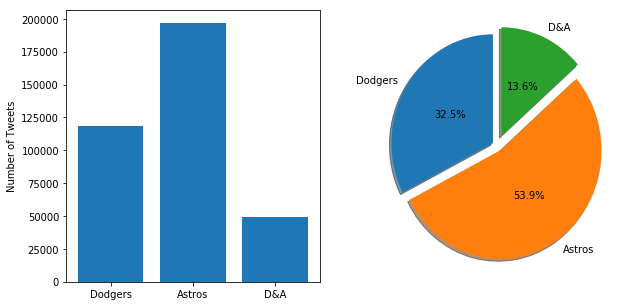

In [228]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.bar([1,2,3],[168218-49545,246465-49545,49545])
plt.xticks((1,2,3),("Dodgers","Astros","D&A"))
plt.ylabel("Number of Tweets")

plt.subplot(122)
plt.pie(x=[168218-49545,246465-49545,49545],labels=["Dodgers","Astros","D&A"],explode=[0.05,0.05,0.1],autopct='%1.1f%%'
        ,shadow=True,startangle = 90,pctdistance = 0.5)

plt.show()

##### SQL Queries

In [243]:
queries='''
SELECT count(text) AS Dodgers_Tweets_Numbers
FROM tweets
WHERE lower(text) LIKE "%dodgers%"
'''
sqlc.sql(queries).show()

+----------------------+
|Dodgers_Tweets_Numbers|
+----------------------+
|                168218|
+----------------------+



In [244]:
queries='''
SELECT count(text) AS Astros_Tweets_Numbers
FROM tweets
WHERE lower(text) LIKE "%astros%"
'''
sqlc.sql(queries).show()

+---------------------+
|Astros_Tweets_Numbers|
+---------------------+
|               246465|
+---------------------+



In [246]:
queries='''
SELECT count(text) AS DA_Tweets_Numbers
FROM tweets
WHERE lower(text) LIKE "%dodgers%" AND  lower(text) LIKE "%astros%" 
'''
sqlc.sql(queries).show()

+-----------------+
|DA_Tweets_Numbers|
+-----------------+
|            49545|
+-----------------+



* The results are the same.

## Part 3 - More complex queries

For this section, you may choose to use dataframe queries or SQL.  If you wish, you may verify results by using both, as in Part 2, but this is not required for this section.

### Q3.1 - Team mentions by location

In which users' locations are the Astros and the Dodgers being mentioned the most?  Consider each team separately, one at a time.  Discuss your findings.

Hint:  you may use either the time zones or user-specified locations for this question.

**Answer**

* Let's start with SQL.

* Dodgers:

In [20]:
queries='''
SELECT user.location AS location, count(text) AS Dodgers_Tweets_Numbers
FROM tweets
WHERE lower(text) LIKE "%dodgers%"
GROUP BY user.location
ORDER BY Dodgers_Tweets_Numbers DESC
'''
sqlc.sql(queries).show(5)

+---------------+----------------------+
|       location|Dodgers_Tweets_Numbers|
+---------------+----------------------+
|           null|                 49988|
|Los Angeles, CA|                  6361|
|California, USA|                  2701|
|    Houston, TX|                  2362|
|    Los Angeles|                  1967|
+---------------+----------------------+
only showing top 5 rows



* ASTROS:

In [22]:
queries='''
SELECT user.location AS location, count(text) AS Astros_Tweets_Numbers
FROM tweets
WHERE lower(text) LIKE "%astros%" 
GROUP BY user.location
ORDER BY Astros_Tweets_Numbers DESC
'''
sqlc.sql(queries).show(5)

+---------------+---------------------+
|       location|Astros_Tweets_Numbers|
+---------------+---------------------+
|           null|                67295|
|    Houston, TX|                17639|
|     Texas, USA|                 4159|
|          Texas|                 2647|
|Los Angeles, CA|                 2448|
+---------------+---------------------+
only showing top 5 rows



* That's it! LA VS Houston!

##### DataFrame Commands

In [16]:
from pyspark.sql import functions

* Astros:

In [182]:
tweets.filter(functions.lower(tweets.text).like("%astros%")) \
      .groupBy("user.location") \
      .count() \
      .sort("count",ascending=False) \
      .show(5)

+---------------+-----+
|       location|count|
+---------------+-----+
|           null|67295|
|    Houston, TX|17639|
|     Texas, USA| 4159|
|          Texas| 2647|
|Los Angeles, CA| 2448|
+---------------+-----+
only showing top 5 rows



* Dodgers:

In [29]:
tweets.filter(functions.lower(tweets.text).like("%dodgers%")) \
      .groupBy("user.location") \
      .count() \
      .sort("count",ascending=False) \
      .show(5)

+---------------+-----+
|       location|count|
+---------------+-----+
|           null|49988|
|Los Angeles, CA| 6361|
|California, USA| 2701|
|    Houston, TX| 2362|
|    Los Angeles| 1967|
+---------------+-----+
only showing top 5 rows



* Same results!

### Q3.2 - Which Twitter users are being replied to the most?

Discuss your findings.

Hint: use the top-level `in_reply_to_screen_name` for this.

**Answer**

##### SQL Queries

In [69]:
queries='''
SELECT in_reply_to_screen_name, COUNT(in_reply_to_screen_name) AS replied_number
FROM tweets
WHERE in_reply_to_screen_name is not NULL
GROUP BY in_reply_to_screen_name
ORDER BY replied_number DESC
LIMIT 10
'''
sqlc.sql(queries).show(10)

+-----------------------+--------------+
|in_reply_to_screen_name|replied_number|
+-----------------------+--------------+
|                 astros|          4034|
|                Dodgers|          3297|
|                    MLB|           705|
|          stephenasmith|           332|
|               MLBONFOX|           217|
|              adevaldes|           180|
|          DodgersNation|           165|
|          rolandsmartin|           141|
|        JustinVerlander|           118|
|          DodgerInsider|           113|
+-----------------------+--------------+



##### DataFrame Commands

In [181]:
tweets.select("in_reply_to_screen_name") \
      .groupBy("in_reply_to_screen_name") \
      .count() \
      .filter(tweets.in_reply_to_screen_name.isNotNull()) \
      .sort("count",ascending=False) \
      .show(10)

+-----------------------+-----+
|in_reply_to_screen_name|count|
+-----------------------+-----+
|                 astros| 4034|
|                Dodgers| 3297|
|                    MLB|  705|
|          stephenasmith|  332|
|               MLBONFOX|  217|
|              adevaldes|  180|
|          DodgersNation|  165|
|          rolandsmartin|  141|
|        JustinVerlander|  118|
|          DodgerInsider|  113|
+-----------------------+-----+
only showing top 10 rows



* Same results.

* Undoubtedly, two official team twitter accounts, @astros and @Dodgers, together with @MLB, got the most replies.
* Note that @stephenasmith is an ESPN commentator and he also won so many retweets.

### Q3.3 - Which 10 verified users have the most followers?  Which 10 unverified users have the most followers?

Provide both the screen names and follower counts for each.

Discuss your findings.

**Answer**

##### SQL Queries

In [120]:
queries='''
SELECT user.screen_name, user.id, user.followers_count
FROM tweets
WHERE user.verified = true
ORDER BY user.followers_count DESC
LIMIT 20
'''
sqlc.sql(queries).show(20)

+--------------+---------+---------------+
|   screen_name|       id|followers_count|
+--------------+---------+---------------+
|        cnnbrk|   428333|       53191119|
|       nytimes|   807095|       39959480|
|           CNN|   759251|       38209973|
|       Reuters|  1652541|       18937529|
|       FoxNews|  1367531|       16272836|
|           ABC| 28785486|       12551437|
|washingtonpost|  2467791|       11417638|
|   lopezdoriga|236636515|        7859821|
|           MLB| 18479513|        7841255|
|           MLB| 18479513|        7840827|
|           MLB| 18479513|        7840739|
|           MLB| 18479513|        7840722|
|           MLB| 18479513|        7840418|
|           MLB| 18479513|        7840013|
|           MLB| 18479513|        7839381|
|           MLB| 18479513|        7839037|
|           MLB| 18479513|        7837673|
|           MLB| 18479513|        7837211|
|           NPR|  5392522|        7289619|
|           NPR|  5392522|        7289492|
+----------

* Are you kidding me? We've got so many MLBs before NPR showed up!
* Let's clean the mess.

##### For verified user:

In [121]:
queries='''
SELECT user.id, user.screen_name, MAX(user.followers_count) AS followers
FROM tweets
WHERE user.verified = true
GROUP BY user.id, user.screen_name
ORDER BY followers DESC
LIMIT 10
'''
sqlc.sql(queries).show(10)

+---------+--------------+---------+
|       id|   screen_name|followers|
+---------+--------------+---------+
|   428333|        cnnbrk| 53191119|
|   807095|       nytimes| 39959480|
|   759251|           CNN| 38209973|
|  1652541|       Reuters| 18937529|
|  1367531|       FoxNews| 16272836|
| 28785486|           ABC| 12551437|
|  2467791|washingtonpost| 11417638|
|236636515|   lopezdoriga|  7859821|
| 18479513|           MLB|  7841255|
|  5392522|           NPR|  7289619|
+---------+--------------+---------+



##### For unverified user:

In [122]:
queries='''
SELECT user.id, user.screen_name, MAX(user.followers_count) AS followers
FROM tweets
WHERE user.verified = false
GROUP BY user.id, user.screen_name
ORDER BY followers DESC
LIMIT 10
'''
sqlc.sql(queries).show(10)

+----------+---------------+---------+
|        id|    screen_name|followers|
+----------+---------------+---------+
|  99943864|Daminous_Purity|   998742|
|  29614331|        chochos|   833669|
| 202409095|     TexasHumor|   816301|
|  82971772|  el_carabobeno|   725952|
|  20897273|       PAMsLOvE|   712254|
|  18691328| mlbtraderumors|   659851|
|  24733117|        jilevin|   568341|
|2796081233|    sun_das_ill|   559669|
|  59714229|   DiegoArcos14|   544926|
|  54989438|    TVCDeportes|   543095|
+----------+---------------+---------+



##### DataFrame Commands

In [179]:
tweets.select("user.verified","user.id", "user.screen_name", "user.followers_count") \
      .groupBy("verified","id","screen_name") \
      .max("followers_count") \
      .sort("max(followers_count)",ascending=False) \
      .filter('verified="true"') \
      .show(10)

+--------+---------+--------------+--------------------+
|verified|       id|   screen_name|max(followers_count)|
+--------+---------+--------------+--------------------+
|    true|   428333|        cnnbrk|            53191119|
|    true|   807095|       nytimes|            39959480|
|    true|   759251|           CNN|            38209973|
|    true|  1652541|       Reuters|            18937529|
|    true|  1367531|       FoxNews|            16272836|
|    true| 28785486|           ABC|            12551437|
|    true|  2467791|washingtonpost|            11417638|
|    true|236636515|   lopezdoriga|             7859821|
|    true| 18479513|           MLB|             7841255|
|    true|  5392522|           NPR|             7289619|
+--------+---------+--------------+--------------------+
only showing top 10 rows



In [180]:
tweets.select("user.verified","user.id", "user.screen_name", "user.followers_count") \
      .groupBy("verified","id","screen_name") \
      .max("followers_count") \
      .sort("max(followers_count)",ascending=False) \
      .filter('verified="false"') \
      .show(10)

+--------+----------+---------------+--------------------+
|verified|        id|    screen_name|max(followers_count)|
+--------+----------+---------------+--------------------+
|   false|  99943864|Daminous_Purity|              998742|
|   false|  29614331|        chochos|              833669|
|   false| 202409095|     TexasHumor|              816301|
|   false|  82971772|  el_carabobeno|              725952|
|   false|  20897273|       PAMsLOvE|              712254|
|   false|  18691328| mlbtraderumors|              659851|
|   false|  24733117|        jilevin|              568341|
|   false|2796081233|    sun_das_ill|              559669|
|   false|  59714229|   DiegoArcos14|              544926|
|   false|  54989438|    TVCDeportes|              543095|
+--------+----------+---------------+--------------------+
only showing top 10 rows



* Again, same results!

* We can see that some twitter users are gaining more followers, especially MLB.
* It seems that every time MLB post a tweet, the follower number increased a lot.
* MLB is the official account of the whole series games. No wonder more people followed MLB during that time.

### Q3.4 - What are the most popular sets of hashtags among users with many followers?  Are they the same as among users with few followers?

Decide for yourself exactly how many followers you believe to be "many", and explain your decision.  You may use queries and statistics to support this decision if you wish.

Hint: if your sample tweet above does not include hashtags under the `entities` field, generate a new example by running the `shuf` command again until you find one that does.

Hint 2: the hashtag texts will be in an array, so you may need some functions you haven't used before.  If you're using SQL, see the docs for [Hive SQL](https://docs.treasuredata.com/articles/hive-functions) for details, (and consider `CONCAT_WS`, for example).

Discuss your findings.

**Answer**

* Let's see the quantiles of follower numbers first.

In [200]:
tweets.select("user.id", "user.followers_count") \
      .groupBy("id") \
      .max("followers_count") \
      .sort("max(followers_count)",ascending=False) \
      .approxQuantile("max(followers_count)",(0.01,0.05,0.1,0.25,0.75,0.9,0.95,0.99),relativeError=0)

[1.0, 17.0, 41.0, 127.0, 694.0, 1618.0, 3449.0, 27438.0]

##### We will choose the top 10% most followed users as Many-Follower-Users and the last 10% most followed users as Few-Follower-Users.
##### Top10%: users with more than 1618 followers
##### Last 10%: users with less than 41 followers

* Let's see some hashtag examples.

In [71]:
tweets.select("entities.hashtags.text").show(10)

+--------------------+
|                text|
+--------------------+
|            [Astros]|
|                  []|
|                  []|
|                  []|
|       [WorldSeries]|
|       [WorldSeries]|
|         [ASTROSWIN]|
|[LosAstros, Serie...|
|                  []|
|[ThisTeam, WorldS...|
+--------------------+
only showing top 10 rows



##### DataFrame Commands

In [58]:
from pyspark.sql import functions

In [63]:
many=tweets.select("entities.hashtags.text", "user.followers_count") \
      .sort("followers_count",ascending=False) \
      .filter('followers_count > 1618') \
      .select("text") \
      .select(functions.collect_list("text")) \
      .take(1)[0][0]

In [66]:
from operator import add  
mylist=[]
for everylist in many:
    for everyhashtag in everylist:
        mylist.append(everyhashtag)
myspark=spark.parallelize(mylist)
myspark.map(lambda x:(x,1)) \
       .reduceByKey(add) \
       .map(lambda x: (x[1], x[0])) \
       .sortByKey(ascending=False) \
       .map(lambda x: (x[1], x[0])) \
       .take(10)

[('WorldSeries', 8514),
 ('Astros', 5655),
 ('Dodgers', 4514),
 ('EarnHistory', 4268),
 ('ThisTeam', 3903),
 ('HR4HR', 967),
 ('SerieMundial', 914),
 ('WorldSeries2017', 880),
 ('worldseries', 745),
 ('astros', 514)]

In [339]:
few=tweets.select("entities.hashtags.text", "user.followers_count") \
      .sort("followers_count",ascending=False) \
      .filter('followers_count < 41') \
      .select("text") \
      .select(functions.collect_list("text")) \
      .take(1)[0][0]

In [340]:
from operator import add  
mylist=[]
for everylist in few:
    for everyhashtag in everylist:
        mylist.append(everyhashtag)
myspark=spark.parallelize(mylist)
myspark.map(lambda x:(x,1)) \
       .reduceByKey(add) \
       .map(lambda x: (x[1], x[0])) \
       .sortByKey(ascending=False) \
       .map(lambda x: (x[1], x[0])) \
       .take(10)

[(4482, 'WorldSeries'),
 (3646, 'HR4HR'),
 (3495, 'ThisTeam'),
 (3208, 'EarnHistory'),
 (2614, 'Astros'),
 (1784, 'Dodgers'),
 (1101, 'LetsCloseThisOut'),
 (811, 'WorldSeries2017'),
 (547, 'astros'),
 (523, 'worldseries')]

* Two user groups almost share the same popular hashtag sets.

* But we can see the difference in hashtags:
* "SerieMundial" only in Many-Follower-Users;
* "LetsCloseThisOut" only in Few-Follower-Users.

* The above method is a more python-based method.
* Let's try another way to do it!

In [69]:
tweets.filter("user.followers_count > 1618").select("entities.hashtags.text").rdd \
        .flatMap(lambda x:x[0]) \
        .map(lambda x:(x,1)) \
        .reduceByKey(lambda a, b: a + b) \
        .takeOrdered(10, key=lambda pair: -pair[1])

[('WorldSeries', 8514),
 ('Astros', 5655),
 ('Dodgers', 4514),
 ('EarnHistory', 4268),
 ('ThisTeam', 3903),
 ('HR4HR', 967),
 ('SerieMundial', 914),
 ('WorldSeries2017', 880),
 ('worldseries', 745),
 ('astros', 514)]

In [70]:
tweets.filter("user.followers_count < 41").select("entities.hashtags.text").rdd \
        .flatMap(lambda x:x[0]) \
        .map(lambda x:(x,1)) \
        .reduceByKey(lambda a, b: a + b) \
        .takeOrdered(10, key=lambda pair: -pair[1])

[('WorldSeries', 4482),
 ('HR4HR', 3646),
 ('ThisTeam', 3495),
 ('EarnHistory', 3208),
 ('Astros', 2614),
 ('Dodgers', 1784),
 ('LetsCloseThisOut', 1101),
 ('WorldSeries2017', 811),
 ('astros', 547),
 ('worldseries', 523)]

* Same results!

##### SQL Queries

In [78]:
queries='''
SELECT hashtag, COUNT(1) AS number
FROM 
(SELECT explode(entities.hashtags.text) AS hashtag 
FROM tweets 
WHERE user.followers_count > 1618)
GROUP BY hashtag 
ORDER BY number DESC
LIMIT 10
'''
sqlc.sql(queries).show(10)

+---------------+------+
|        hashtag|number|
+---------------+------+
|    WorldSeries|  8514|
|         Astros|  5655|
|        Dodgers|  4514|
|    EarnHistory|  4268|
|       ThisTeam|  3903|
|          HR4HR|   967|
|   SerieMundial|   914|
|WorldSeries2017|   880|
|    worldseries|   745|
|         astros|   514|
+---------------+------+



In [79]:
queries='''
SELECT hashtag, COUNT(1) AS number
FROM 
(SELECT explode(entities.hashtags.text) AS hashtag 
FROM tweets 
WHERE user.followers_count < 41)
GROUP BY hashtag 
ORDER BY number DESC
LIMIT 10
'''
sqlc.sql(queries).show(10)

+----------------+------+
|         hashtag|number|
+----------------+------+
|     WorldSeries|  4482|
|           HR4HR|  3646|
|        ThisTeam|  3495|
|     EarnHistory|  3208|
|          Astros|  2614|
|         Dodgers|  1784|
|LetsCloseThisOut|  1101|
| WorldSeries2017|   811|
|          astros|   547|
|     worldseries|   523|
+----------------+------+



* Again, same results!

### Q3.5 - Analyze common words in tweet text

Following the example in class, use `tweets.rdd` to find the most common interesting words in tweet text.  To keep it "interesting", add a filter that removes at least 10 common stop words found in tweets, like "a", "an", "the", and "RT" (you might want to derive these stop words from initial results).  To split lines into words, a simple split on text whitespace like we had in class is sufficient; you do not have to account for punctuation.

After you find the most common words, use dataframe or SQL queries to find patterns among how those words are used.  For example, are they more frequently used by Dodgers or Astros fans, or by people in one part of the country over another?  Explore and see what you can find, and discuss your findings.

Hint: don't forget all the word count pipeline steps we used earlier in class.

**Answer**

* Let's see some tweet text examples.

In [17]:
tweets.select("text").rdd.take(5)

[Row(text='@ROSGO21 Hey gal.  #Astros'),
 Row(text='RT @brianmctaggart: The Astros will give the ball to Justin Verlander on Tuesday night with a chance to win their first World Series.'),
 Row(text='@TwitterMoments @astros @Dodgers Hell yeah!! NFL has nothing on MLB! https://t.co/IEhPtgMlsd'),
 Row(text='Hall-of-Fame caliber tweet https://t.co/0NQFE9oUp5'),
 Row(text='RT @abc13sports: We literally love the @astros rn. #WorldSeries')]

* Note that the most used language is en(English) and es(Spanish). So, we will add some Spanish stopwords to our list.

In [55]:
mystoplist=["","en","los","el","la","rt","i","a", "about", "above", "across", "after", "afterwards", "again",
            "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst",
            "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", 
            "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", 
            "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", 
            "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co",
            "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", 
            "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc",
            "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few",
            "fify", "fill", "find", "fire","for", "former", "formerly", "found",
            "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have",
            "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", 
            "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", 
            "interest", "into", "is", "it", "its", "itself","last", "latter", "latterly", "least",
            "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", 
            "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither",
            "never", "nevertheless", "next", "no", "nobody", "none", "noone", "nor", "not", "nothing", 
            "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", 
            "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please",
            "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", 
            "she", "should", "show", "side", "since", "sincere", "so", "some", "somehow", 
            "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", 
            "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", 
            "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this",
            "those", "though","through", "throughout", "thru", "thus", "to", "together", "too", "top",
            "toward", "towards","un", "under", "until", "up", "upon", "us", "very", 
            "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where",
            "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while",
            "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", 
            "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]

In [52]:
tweets.rdd \
    .flatMap(lambda x:x["text"].split(' ')) \
    .filter(lambda x:x.lower() not in mystoplist) \
    .map(lambda t: (t, 1)) \
    .reduceByKey(lambda a, b: a + b) \
    .takeOrdered(10, key=lambda pair: -pair[1])

[('Astros', 69114),
 ('Dodgers', 52408),
 ('@astros:', 49821),
 ('#WorldSeries', 49706),
 ('@astros', 37272),
 ('#ThisTeam', 36593),
 ('#EarnHistory', 34614),
 ('@Dodgers', 28882),
 ('#Astros', 26485),
 ('game', 26401)]

* But most words we have is @twitterusers and #hashtags.

* We will eliminate these words for that we have discussed some ideas about hashtags and replies.

In [53]:
tweets.rdd \
    .flatMap(lambda x:x["text"].split(' ')) \
    .filter(lambda x:x.lower() not in mystoplist) \
    .filter(lambda x: ("@" not in x) and ("#" not in x)) \
    .map(lambda t: (t, 1)) \
    .reduceByKey(lambda a, b: a + b) \
    .takeOrdered(20, key=lambda pair: -pair[1])

[('Astros', 69114),
 ('Dodgers', 52408),
 ('game', 26401),
 ('win', 19276),
 ('World', 14800),
 ('just', 14678),
 ('dodgers', 14512),
 ('Series', 12568),
 ('Game', 11636),
 ('5', 11606),
 ('ASTROS', 10086),
 ('TIE', 9977),
 ('astros', 9744),
 ('fan', 9031),
 ('lead', 8801),
 ('like', 8734),
 ('&amp;', 8331),
 ("LET'S", 7997),
 ('fans', 7968),
 ('home', 7960)]

* We will transform all the upper case to lower case and see what we can get.

In [56]:
tweets.rdd \
    .flatMap(lambda x:x["text"].split(' ')) \
    .filter(lambda x:x.lower() not in mystoplist) \
    .filter(lambda x: ("@" not in x) and ("#" not in x)) \
    .map(lambda t: (t.lower(), 1)) \
    .reduceByKey(lambda a, b: a + b) \
    .takeOrdered(20, key=lambda pair: -pair[1])

[('astros', 88985),
 ('dodgers', 70845),
 ('game', 45437),
 ('win', 23221),
 ('series', 18643),
 ('world', 18191),
 ('just', 16684),
 ("let's", 13985),
 ('tie', 13172),
 ('5', 11606),
 ('lead', 10961),
 ('fan', 10088),
 ('come', 9461),
 ('like', 9364),
 ('home', 9340),
 ('fans', 8974),
 ('houston', 8459),
 ('&amp;', 8331),
 ('damn', 7945),
 ('run', 7718)]

* We find some interesting words: "damn","run","home" and "tie".

* We will use SQL to do analysis because SQL queries are easier to modify.

In [89]:
queries='''
SELECT text
FROM tweets 
WHERE LOWER(text) like "% home %" or text like "% run %"
LIMIT 10
'''
sqlc.sql(queries).take(5)

[Row(text='RT @NBCSports: Behind barrage of home runs, @astros outslug @Dodgers to win Game 5, 13-12, in extra innings. #WorldSeries… '),
 Row(text="RT @BPinstripes: I know they're going back home but facing Verlander/McCullers possibly in next 2 games and having a burnt-out bullpen, Dod…"),
 Row(text='RT @HoustonChron: Astros win.\n\nAlex Bregman hits a walk-off home run in the bottom of the tenth.\n\n#WorldSeries Game 5: Astros 13, Dod… '),
 Row(text='RT @HoustonChron: Astros win.\n\nAlex Bregman hits a walk-off home run in the bottom of the tenth.\n\n#WorldSeries Game 5: Astros 13, Dod… '),
 Row(text='RT @Dbacks_4: Can someone on the Astros hit a home run so I can go to bed please. I have school in the morning. Appreciate it 👌🏻')]

* A home run by Astros!

In [90]:
queries='''
SELECT text
FROM tweets 
WHERE LOWER(text) like "% tie %"
LIMIT 10
'''
sqlc.sql(queries).take(5)

[Row(text='We saw this coming.  Astros, Dodgers tie World Series record for most homers in one series (Update: They broke it) https://t.co/PeXfMjauKa'),
 Row(text="RT @astros: TIE GAME YULI GURRIEL LET'S GOOOOOO!!! https://t.co/zYarNVCfv3"),
 Row(text='Ladies and gentleman we have a tie for 2nd most runs EVER in a #WorldSeries game #Astros 13-12 #DodgersVsAstros https://t.co/wNG4aT5z2L'),
 Row(text='RT @latimes: Astros, Dodgers tie World Series record for most homers in one series (Update: They broke it)… '),
 Row(text='RT @astros: 🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐 TIE GAME 🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐🐐… ')]

* Astros and Dodgers tied World Series!

* How about "damn"? Let's see some examples.

In [91]:
queries='''
SELECT DISTINCT text
FROM tweets 
WHERE LOWER(text) like "% damn %"
LIMIT 10
'''
sqlc.sql(queries).take(5)

[Row(text="@Dodgers Chokeshaw is a damn liberal cuck who needs to find a new team. I'm so damn sick of all these pussy fucking… https://t.co/ViK8n8P5Yz"),
 Row(text='@astros @ABREG_1 Series MVP is going to the whole damn team! Great job stros!'),
 Row(text='Dear @Dodgers , \n  Tell your pitchers to quit walking the world and hanging damn curveballs.\n  Best Regards,\n  Rene'),
 Row(text='Pinchè Astros just won’t go away!! Got damn it \U0001f926🏽\u200d♂️'),
 Row(text="I'm watching The World Series, and I don't know the first damn thing about Baseball... OH! The ASTROS just made a TOUCHDOWN!!! 👏")]

In [124]:
queries='''
SELECT
    CASE WHEN LOWER(text) like "% astros %" AND LOWER(text) like "% dodgers %" THEN "both"
         WHEN LOWER(text) like "% astros %" THEN "astros"
         WHEN LOWER(text) like "% dodgers %" THEN "dodgers"
         ELSE "unknown"
    END AS memtioned
,COUNT(1) AS number
FROM tweets
WHERE LOWER(text) like "% damn %"
GROUP BY memtioned
ORDER BY number DESC
'''
sqlc.sql(queries).show()

+---------+------+
|memtioned|number|
+---------+------+
|  unknown|  6088|
|   astros|  1163|
|  dodgers|   214|
|     both|    38|
+---------+------+



* Astros are more frequently memtioned in those "damn"-tweets.

In [104]:
queries='''
SELECT user.location, count(text) AS number
FROM tweets 
WHERE LOWER(text) like "% damn %"
GROUP BY user.location
ORDER BY number DESC
LIMIT 10
'''
sqlc.sql(queries).show(5)

+--------------+------+
|      location|number|
+--------------+------+
|          null|  2232|
|   Houston, TX|   712|
|    Texas, USA|   144|
|         Texas|    90|
|Houston, Texas|    59|
+--------------+------+
only showing top 5 rows



* Most "damn" were from Texas, especially Houston.
* No wonder Astros are more frequently memtioned in those "damn"-tweets.

In [110]:
queries='''
SELECT AVG(user.followers_count)
FROM tweets 
WHERE LOWER(text) like "% damn %"
'''
sqlc.sql(queries).show()

+----------------------------------------------+
|avg(user.followers_count AS `followers_count`)|
+----------------------------------------------+
|                            1648.6881247500999|
+----------------------------------------------+



* Those users who used "damn" have an average follower number of 1648.
* It's more than that number of top 10% Many-Follower-Users.
* Who are these guys!

In [117]:
queries='''
SELECT user.id, user.screen_name , MAX(user.followers_count) AS followers
FROM tweets 
WHERE LOWER(text) like "% damn %"
GROUP BY user.id, user.screen_name
ORDER BY followers DESC
LIMIT 10 
'''
sqlc.sql(queries).show(10)

+----------+---------------+---------+
|        id|    screen_name|followers|
+----------+---------------+---------+
|  23022687|        tedcruz|  3072380|
|  16116288|  rolandsmartin|   479829|
|1032487710|       5HonTour|   270932|
|  28355356|    LSUbaseball|   255541|
|  38271176|    xxFABLIFExx|   147356|
| 208164406|iRhymeForReason|   108888|
|  20731383|      mattpro13|    89354|
|  24987045|    PageKennedy|    88031|
| 971053291|     5HWorldCom|    81267|
|  50807740|alexandrafranco|    70753|
+----------+---------------+---------+



* Oh, come on, Ted Cruz is here!

* DAMN!